TASK:1

DATA PREPROCESSING


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:


base_dir = '/content/drive/MyDrive/datasets/weather classification'

using image_dataset_from_directory to read images

In [4]:

from tensorflow.keras.utils import image_dataset_from_directory, to_categorical


train_dataset = image_dataset_from_directory(
    base_dir + "/train",
    image_size=(180, 180),
    batch_size=256,
    label_mode='categorical'
)

validation_dataset = image_dataset_from_directory(
    base_dir + "/validation",
    image_size=(180, 180),
    batch_size=256,
    label_mode='categorical'
)

test_dataset = image_dataset_from_directory(
    base_dir + "/test",
    image_size=(180, 180),
    batch_size=256,
    label_mode='categorical'
)


Found 400 files belonging to 4 classes.
Found 200 files belonging to 4 classes.
Found 525 files belonging to 4 classes.


Displaying the shapes of the data and labels yielded by the Dataset

In [5]:

for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break


data batch shape: (256, 180, 180, 3)
labels batch shape: (256, 4)


Define the model architecture

In [7]:
from tensorflow import keras
from tensorflow.keras import layers


inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │          50,180 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,028,676 (3.92 MB)

 Trainable params: 1,028,676 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

Fitting the model using a Dataset

In [8]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)


In [9]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)



Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 85s 51s/step - accuracy: 0.2463 - loss: 1.6730 - val_accuracy: 0.2500 - val_loss: 1.5749
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 51s 27s/step - accuracy: 0.2563 - loss: 1.5125 - val_accuracy: 0.4450 - val_loss: 1.2314
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 18s/step - accuracy: 0.4269 - loss: 1.1865 - val_accuracy: 0.2500 - val_loss: 3.0734
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 80s 17s/step - accuracy: 0.2816 - loss: 2.5890 - val_accuracy: 0.3300 - val_loss: 1.0633
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 44s 19s/step - accuracy: 0.4418 - loss: 1.0737 - val_accuracy: 0.4750 - val_loss: 1.0038
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 18s/step - accuracy: 0.4740 - loss: 1.0111 - val_accuracy: 0.5550 - val_loss: 0.9349
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 79s 17s/step - accuracy: 0.5254 - loss: 0.9292 - val_accuracy: 0.4650 - val_loss: 0.9843
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 17s/step - accuracy: 0.4542 - loss: 0.9922 - val_accuracy: 0.3500 - val_loss: 1.3470


Displaying curves of loss and accuracy during training

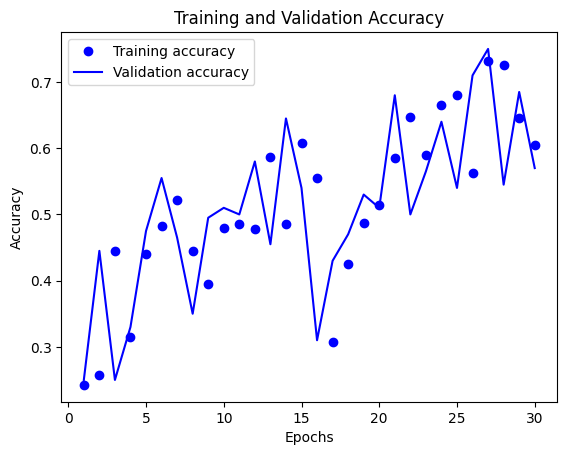

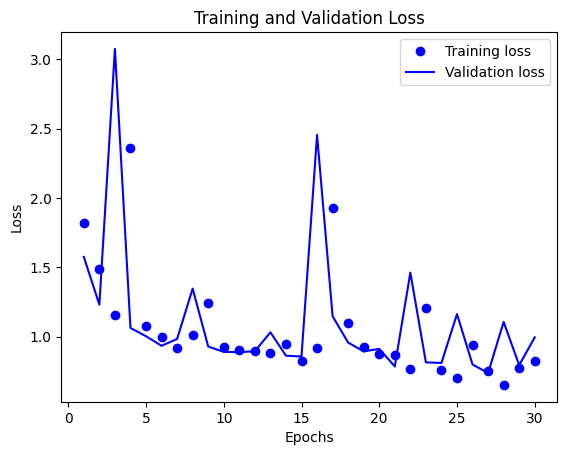

In [11]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


Evaluating the model on the test set

In [12]:
test_model = keras.models.load_model("convnet_from_scratch.keras")

test_loss, test_acc = test_model.evaluate(test_dataset)

print(f"Test accuracy: {test_acc:.3f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 90s 20s/step - accuracy: 0.7628 - loss: 0.5629
Test accuracy: 0.760


TASK-02


Define data augmentation

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),  # Randomly flip images horizontally
        layers.RandomRotation(0.1),        # Randomly rotate images by 10%
        layers.RandomZoom(0.2),            # Randomly zoom into images by 20%
    ]
)


Displaying some randomly augmented training images

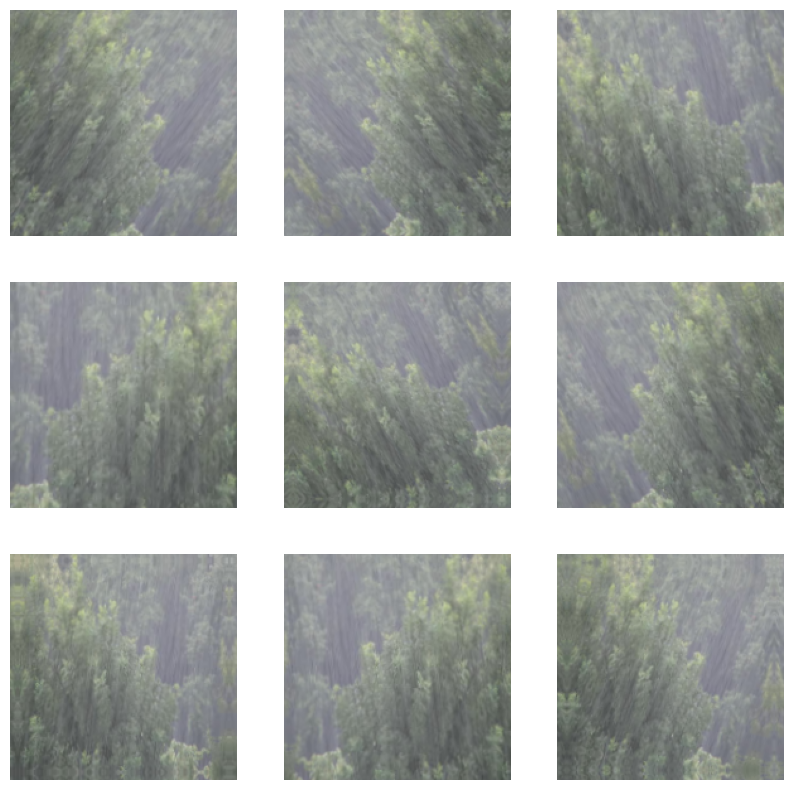

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
plt.show()


Defining a new convnet that includes image augmentation and dropout

In [15]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)  # Using softmax for multi-class output
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │          50,180 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,028,676 (3.92 MB)

 Trainable params: 1,028,676 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    loss="categorical_crossentropy",  # Using categorical cross-entropy for multi-class classification
    optimizer="rmsprop",
    metrics=["accuracy"]
)

Training the regularized convnet

In [19]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 46s 20s/step - accuracy: 0.6226 - loss: 0.7151 - val_accuracy: 0.5600 - val_loss: 0.8246
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 79s 18s/step - accuracy: 0.6452 - loss: 0.6724 - val_accuracy: 0.6150 - val_loss: 0.8380
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 44s 19s/step - accuracy: 0.6660 - loss: 0.6908 - val_accuracy: 0.5850 - val_loss: 0.7980
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 83s 19s/step - accuracy: 0.6660 - loss: 0.6417 - val_accuracy: 0.6050 - val_loss: 0.7574
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 85s 18s/step - accuracy: 0.7153 - loss: 0.5831 - val_accuracy: 0.6600 - val_loss: 1.0435
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 44s 19s/step - accuracy: 0.6849 - loss: 0.7380 - val_accuracy: 0.3750 - val_loss: 1.2457
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 49s 23s/step - accuracy: 0.5819 - loss: 1.0042 - val_accuracy: 0.7450 - val_loss: 0.6980
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 76s 18s/step - accuracy: 0.7493 - loss: 0.5941 - val_accuracy: 0.7550 - val_loss: 0.6507


 Evaluate the model on the test dataset


In [21]:

test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")


test_loss, test_acc = test_model.evaluate(test_dataset)

print(f"Test accuracy: {test_acc:.3f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.8583 - loss: 0.3908
Test accuracy: 0.857



#After applying data augmentation


 - **Higher Accuracy**: The test accuracy increased from 76.0% to 85.7%, indicating a significant improvement in the model’s ability to classify images accurately

- **Reduced Loss**: The test loss decreased from 0.5629 to 0.3908, reflecting more efficient learning and stronger confidence in predictions.

- **Better Adaptability**: The model benefitted from added variations like flips, rotations, and zooms, helping it generalize better and perform more robustly on unseen data.

TASK-03



Feature extraction with a pretrained model


without augmentation


Instantiating the VGG16 convolutional base

In [22]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)


In [23]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Extracting the VGG16 features and corresponding labels



In [24]:
import numpy as np
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 94s 12s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 10s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 81s 10s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 90s 11s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 92s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [25]:
train_features.shape

(400, 5, 5, 512)

Defining and training the densely connected classifier

---



In [26]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5475 - loss: 39.3266 - val_accuracy: 0.8450 - val_loss: 9.5942
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9665 - loss: 1.1689 - val_accuracy: 0.8400 - val_loss: 11.0131
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9706 - loss: 0.7081 - val_accuracy: 0.8650 - val_loss: 7.1398
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9914 - loss: 0.7343 - val_accuracy: 0.8850 - val_loss: 5.6927
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9918 - loss: 0.1418 - val_accuracy: 0.8850 - val_loss: 7.5850
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9937 - loss: 0.0443 - val_accuracy: 0.8900 - val_loss: 5.6367
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9937 - loss: 0.2570 - val_accuracy: 0.9100 - val_loss: 5.0511
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9888 - loss: 0.3128 - val_accuracy: 0.8850 -

Plotting the results

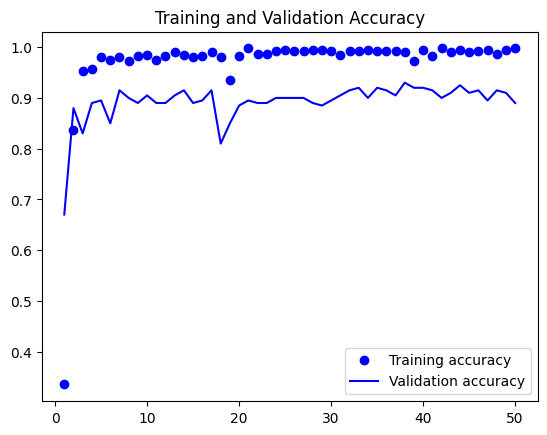

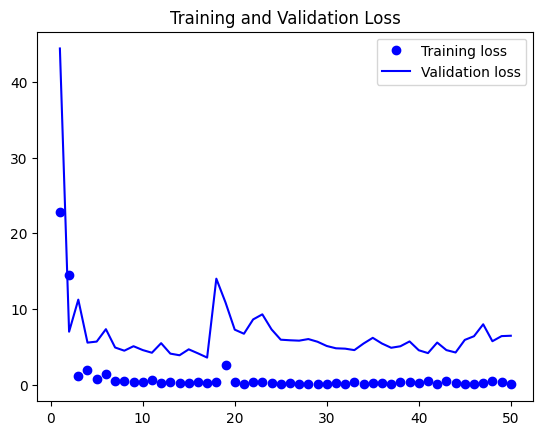

In [36]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()


plt.show()


Evaluate the model on the test dataset

In [32]:
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9157 - loss: 4.4866
Test accuracy: 0.920


Feature extraction together with augmentation


# Instantiate the VGG16 convolutional base


In [33]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)

conv_base.trainable = False


**Adding a data augmentation stage and a classifier to the convolutional base**

In [34]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 237s 128s/step - accuracy: 0.2884 - loss: 20.0760 - val_accuracy: 0.6700 - val_loss: 44.4210
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 248s 124s/step - accuracy: 0.8201 - loss: 16.4266 - val_accuracy: 0.8800 - val_loss: 6.9895
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 280s 146s/step - accuracy: 0.9553 - loss: 1.1269 - val_accuracy: 0.8300 - val_loss: 11.2234
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 243s 124s/step - accuracy: 0.9573 - loss: 2.0413 - val_accuracy: 0.8900 - val_loss: 5.5429
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 332s 195s/step - accuracy: 0.9815 - loss: 0.6076 - val_accuracy: 0.8950 - val_loss: 5.6797
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 266s 135s/step - accuracy: 0.9768 - loss: 1.2110 - val_accuracy: 0.8500 - val_loss: 7.3188
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 261s 140s/step - accuracy: 0.9789 - loss: 0.4972 - val_accuracy: 0.9150 - val_loss: 4.8983
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 252s 123s/step - accuracy: 0.9699 - loss: 0.5405 - val_accuracy: 0.9000

**Evaluating the model on the test set**

In [37]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 201s 49s/step - accuracy: 0.8997 - loss: 4.5036
Test accuracy: 0.899
